## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [2]:
Original_dataset= pd.read_csv("Data_MFR_310.csv")

#Making a copy of original data
data=Original_dataset

In [3]:
data.head()

,Unnamed: 0,513FC31103.pv,513HC31114-5.mv,513PC31201.pv,513LC31202.pv,513FC31409.pv,513FC31114-5.pv,513TC31220.pv,MFR
0,04-05-2018 19:45,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,04-05-2018 21:45,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2
2,04-05-2018 23:45,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2
3,04-06-2018 01:45,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1
4,04-06-2018 03:45,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3


In [4]:
data.describe()

,513FC31103.pv,513HC31114-5.mv,513PC31201.pv,513LC31202.pv,513FC31409.pv,513FC31114-5.pv,513TC31220.pv,MFR
count,2486.000000,2560.000000,2484.000000,2484.000000,2484.00000,2486.000000,2484.000000,2564.000000
mean,25306.285729,0.178427,30.663706,77.651055,42525.14000,0.138530,80.144365,8.185218
std,1706.481672,0.077473,0.423345,0.919600,11331.86896,0.041869,0.823554,5.088696
min,16106.025000,0.000000,26.946344,74.575958,9610.46480,0.022162,77.760117,1.500000
25%,24361.632000,0.136000,30.446129,76.992151,34795.53500,0.113764,79.677458,3.700000
50%,25365.754500,0.173500,30.622631,77.494477,41550.56250,0.132986,80.044308,4.300000
75%,26398.452250,0.200000,30.925738,78.210867,50010.29500,0.156990,80.496296,12.900000
max,30083.688000,0.980000,32.674332,83.841675,106073.61000,0.677979,91.566544,38.000000


## Preprocessing 

### Changing the column names

In [5]:
data.columns

Index(['Unnamed: 0', '513FC31103.pv', '513HC31114-5.mv', '513PC31201.pv',
       '513LC31202.pv', '513FC31409.pv', '513FC31114-5.pv', '513TC31220.pv',
       'MFR'],
      dtype='object')

In [6]:
#Dropping the unwanted column
data.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
data.head()

,513FC31103.pv,513HC31114-5.mv,513PC31201.pv,513LC31202.pv,513FC31409.pv,513FC31114-5.pv,513TC31220.pv,MFR
0,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2
2,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2
3,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1
4,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3


In [8]:
#Changing the column names to understandable names

col=['Propylene flow','Hydrogen ratio','Pressure controller','Level controller',
     'Liquefied Recycle gas to R-310 dome top','Hydrogen Flow','Temperature controller','MFR']

data.columns=col

In [9]:
data.head()

,Propylene flow,Hydrogen ratio,Pressure controller,Level controller,Liquefied Recycle gas to R-310 dome top,Hydrogen Flow,Temperature controller,MFR
0,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2
2,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2
3,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1
4,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3


## Getting the column info

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2564 entries, 0 to 2563
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Propylene flow                           2486 non-null   float64
 1   Hydrogen ratio                           2560 non-null   float64
 2   Pressure controller                      2484 non-null   float64
 3   Level controller                         2484 non-null   float64
 4   Liquefied Recycle gas to R-310 dome top  2484 non-null   float64
 5   Hydrogen Flow                            2486 non-null   float64
 6   Temperature controller                   2484 non-null   float64
 7   MFR                                      2564 non-null   float64
dtypes: float64(8)
memory usage: 160.4 KB


##### The total number of values are not equal which means there are some missing values. Let's see how many missing values are present in each column.

### Getting total null values in each column

In [11]:
data.isna().sum()

Propylene flow                             78
Hydrogen ratio                              4
Pressure controller                        80
Level controller                           80
Liquefied Recycle gas to R-310 dome top    80
Hydrogen Flow                              78
Temperature controller                     80
MFR                                         0
dtype: int64

##### There are approximatly 78-80 null values present in all the independent variables, so we need to handle them in order to avoid misfit and hence giving wrong predictions.

### Dropping the null values

In [12]:
data.dropna(inplace=True)

### Checking the central tendency and dispersion of data

In [13]:
data.describe()

,Propylene flow,Hydrogen ratio,Pressure controller,Level controller,Liquefied Recycle gas to R-310 dome top,Hydrogen Flow,Temperature controller,MFR
count,2484.000000,2484.000000,2484.000000,2484.000000,2484.00000,2484.000000,2484.000000,2484.000000
mean,25304.758777,0.183725,30.663706,77.651055,42525.14000,0.138522,80.144365,8.036594
std,1706.180093,0.072155,0.423345,0.919600,11331.86896,0.041885,0.823554,5.076463
min,16106.025000,0.000000,26.946344,74.575958,9610.46480,0.022162,77.760117,1.500000
25%,24361.490000,0.140000,30.446129,76.992151,34795.53500,0.113757,79.677458,3.700000
50%,25364.311500,0.175000,30.622631,77.494477,41550.56250,0.132971,80.044308,4.300000
75%,26397.439750,0.202000,30.925738,78.210867,50010.29500,0.157029,80.496296,12.800000
max,30083.688000,0.980000,32.674332,83.841675,106073.61000,0.677979,91.566544,38.000000


### Let's see if there is any co-relation between the independent variables

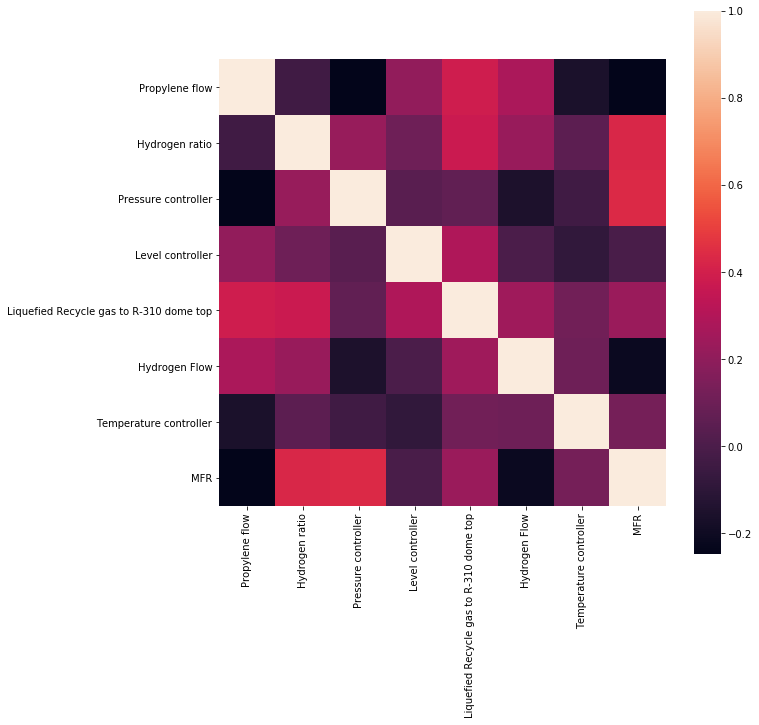

In [14]:
C_mat = data.corr()
fig = plt.figure(figsize = (10,10))

sns.heatmap(C_mat, square = True)
plt.show()

There is not a direct co-relation between the features which means one feature is not completely dependent on another feature. So we can't remove any feature as of now.
(Further the control strategies include controlling the melt flow rate (MFR) by measuring the temperature and pressure in the slurry reactor and by gas chromatography, determining the ratio of hydrogen to propylene, calculating the MFR from a correlation developed from polypropylene process results from these parameters and then adjusting the feed rate of a hydrogen stream into the reactor to cause the MFR to approach or be at a target MFR which will yield a desired product of polypropylene.)

### Printing lowest and highest MFR readings to see the variation

In [15]:
###Finding the min and max reading
data.describe()

,Propylene flow,Hydrogen ratio,Pressure controller,Level controller,Liquefied Recycle gas to R-310 dome top,Hydrogen Flow,Temperature controller,MFR
count,2484.000000,2484.000000,2484.000000,2484.000000,2484.00000,2484.000000,2484.000000,2484.000000
mean,25304.758777,0.183725,30.663706,77.651055,42525.14000,0.138522,80.144365,8.036594
std,1706.180093,0.072155,0.423345,0.919600,11331.86896,0.041885,0.823554,5.076463
min,16106.025000,0.000000,26.946344,74.575958,9610.46480,0.022162,77.760117,1.500000
25%,24361.490000,0.140000,30.446129,76.992151,34795.53500,0.113757,79.677458,3.700000
50%,25364.311500,0.175000,30.622631,77.494477,41550.56250,0.132971,80.044308,4.300000
75%,26397.439750,0.202000,30.925738,78.210867,50010.29500,0.157029,80.496296,12.800000
max,30083.688000,0.980000,32.674332,83.841675,106073.61000,0.677979,91.566544,38.000000


In [16]:
data[(data['MFR']==1.5) | (data['MFR']==38)]

,Propylene flow,Hydrogen ratio,Pressure controller,Level controller,Liquefied Recycle gas to R-310 dome top,Hydrogen Flow,Temperature controller,MFR
2158,21476.721,0.170,30.980965,77.445404,43265.105,0.102537,80.443382,1.5
2234,25052.857,0.134,30.444567,76.506531,43231.895,0.122489,80.067131,38.0


As it can be seen that even with not much difference between the two independent variables, the MFR has changed drastically.
This means that the value of MFR is sensitive to all the factors.

##### The melt flow rate is an indirect measure of molecular weight. There are a few high outliers for certain adjustments in the features. With high melt flow rate corresponds to low molecular weight for a thermoplastic polymer.

### Let's check if there is a pattern in the outliers

In [17]:
#Printing the outliers
data[data['MFR']>=25]

,Propylene flow,Hydrogen ratio,Pressure controller,Level controller,Liquefied Recycle gas to R-310 dome top,Hydrogen Flow,Temperature controller,MFR
1050,20012.021,0.250,32.348621,76.745026,42177.461,0.227957,82.186668,26.0
1557,24806.625,0.197,30.494255,76.783951,48521.250,0.207036,80.026550,35.0
2050,25745.020,0.093,30.512630,77.305084,37348.441,0.121632,80.238747,36.0
2073,25839.051,0.102,30.537281,77.341034,28488.680,0.127742,80.250961,37.0
2213,25682.488,0.128,30.321739,77.069580,40851.652,0.113010,80.103271,35.0
2234,25052.857,0.134,30.444567,76.506531,43231.895,0.122489,80.067131,38.0


### Splitting the Independent and Dependent Variables

In [18]:
X = data.iloc[:,:-1]
y = data['MFR']

### Splitting the dataset into the Training set and Test set

In [19]:
#Splitting into training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

### Standardization of independent variables

In [20]:
#Performing standard scaling
from sklearn.preprocessing import StandardScaler
s=StandardScaler()

X_train=s.fit_transform(X_train)
X_test=s.transform(X_test)

## Building a random forest model

In [21]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=300,random_state=0)

rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [22]:
#Predicting values
y_pred=rf.predict(X_test)

### Evalauting the model

In [23]:
from sklearn.metrics import r2_score
print("R-Sq value= {}".format(r2_score(y_test,y_pred)))

R-Sq value= 0.6967206754158419


The r2 score provides the proportion of variance in the dependent variable that is predictable from the independent variable.

## Building a Support vector model

In [24]:
from sklearn.svm import SVR

svr=SVR(kernel='rbf')
svr.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [25]:
y_pred=svr.predict(X_test)

In [26]:
from sklearn.metrics import r2_score
print("R-Sq value= {}".format(r2_score(y_test,y_pred)))

R-Sq value= 0.6493707924485644


### Evaluating model with cross validation

In [27]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)

In [28]:
print("Mean accuracy: {}".format(accuracies.mean()))
print("Standard deviation: {}".format(accuracies.std()))

Mean accuracy: 0.6878466535325899
Standard deviation: 0.10775132825378558


This shows that the accuracy of the model lies between 68-70%. With more training data sample we might be able to increase the accuracy of the model 